In [1]:
import pandas as pd
import sqlite3
import zipfile
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#rt.movie_info.tsv.gz
movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz',sep="\t")

In [3]:
movie_info.info()
#nulls in everything but id, very low information on box_office, currency, studio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [4]:
movie_info.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [5]:
#rt.reviews.tsv.gz
reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz',sep="\t", encoding = 'unicode_escape')

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [7]:
reviews.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [8]:
reviews_fresh = reviews.loc[reviews['fresh'] == 'fresh']
reviews_fresh

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
...,...,...,...,...,...,...,...,...
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002"
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"


In [9]:
#bom.movie_gross.csv.gz
movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

In [10]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
movie_gross.info()
#nulls in studio, domestic_gross, foreign_gross

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
movie_foreign_gross= movie_gross.dropna(subset=['foreign_gross'])

In [13]:
movie_foreign_gross['foreign_gross'] = movie_foreign_gross['foreign_gross'].str.replace(",","").astype(float)
movie_foreign_gross.head()

<ipython-input-13-40ba1ecd0718>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_foreign_gross['foreign_gross'] = movie_foreign_gross['foreign_gross'].str.replace(",","").astype(float)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [14]:
#tmdb.movies.csv.gz
tmdb = pd.read_csv('./zippedData/tmdb.movies.csv.gz')

In [15]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [16]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [17]:
tmdb['release_month'] = tmdb['release_date'].str[5:7]
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,03
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,05
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,07


In [18]:
grouped_tmdb = tmdb.groupby('release_month')
grouped_tmdb.mean()

,Unnamed: 0,id,popularity,vote_average,vote_count
release_month,,,,,
01,12421.901980,289163.437101,2.180176,5.866762,65.612388
02,13681.524783,284874.361834,3.352600,5.958240,189.337670
03,14003.534497,289719.502909,3.052933,6.042810,168.189942
04,13902.661341,296493.706937,2.784293,6.117537,120.299299
05,13458.068633,293177.639678,3.123663,6.003539,230.502413
06,13376.954755,293923.416898,3.043683,6.067959,203.485688
07,13026.402261,291002.682846,3.585265,5.883710,304.916223
08,13138.877503,295222.210247,3.580677,5.908539,187.911661
09,13049.484099,296616.382067,3.265490,5.955300,167.389134


In [19]:
grouped_tmdb['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
release_month,,,,,,,,
01,3132.0,2.180176,2.974335,0.6,0.60000,0.8830,2.17800,28.138
02,1614.0,3.352600,4.304551,0.6,0.62400,1.5130,4.55400,45.253
03,2406.0,3.052933,3.931685,0.6,0.60000,1.4000,3.77100,45.000
04,2566.0,2.784293,3.783140,0.6,0.60000,1.2410,3.25175,80.773
05,1865.0,3.123663,4.683931,0.6,0.60000,1.3470,3.59900,50.289
06,2166.0,3.043683,4.236429,0.6,0.60000,1.3565,3.38750,36.286
07,1504.0,3.585265,4.990946,0.6,0.62875,1.4000,4.77250,46.775
08,1698.0,3.580677,4.426682,0.6,0.60000,1.6020,5.42175,49.606
09,2264.0,3.265490,4.136450,0.6,0.60150,1.4000,4.38850,36.955


In [20]:
grouped_tmdb['popularity'].mean()

release_month
01    2.180176
02    3.352600
03    3.052933
04    2.784293
05    3.123663
06    3.043683
07    3.585265
08    3.580677
09    3.265490
10    3.081957
11    3.459795
12    3.922681
Name: popularity, dtype: float64

In [21]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

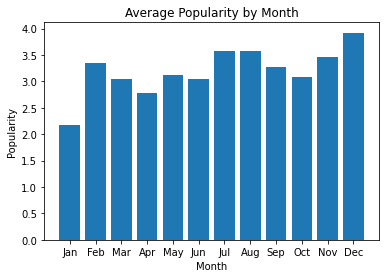

In [22]:
fig, ax = plt.subplots()
ax.bar(months, grouped_tmdb['popularity'].mean())
ax.set_title('Average Popularity by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Popularity');

In [23]:
#tn.movie_budgets.csv.gz
budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

In [24]:
budgets.info()
#no nulls in our budget info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [25]:
budgets.head()
#domestic_ and wordwide_gross, production_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [26]:
#replace object values with integer values for sorting
def money_string_to_float(df, column_name):
    df[column_name] = df[column_name].str[1:]
    df[column_name] = df[column_name].str.replace(',', '').astype(float)
    return df

money_string_to_float(budgets, "production_budget")
money_string_to_float(budgets, "domestic_gross")
money_string_to_float(budgets, "worldwide_gross")

budgets.head()



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [27]:
budgets['foreign_gross'] = budgets['worldwide_gross'] - budgets['domestic_gross']
budgets['foreign_gross'].sort_values(ascending=False)
budgets['release_month'] = budgets['release_date'].str[0:3]
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000e+00,Dec
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,1.920130e+05,Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,0.000000e+00,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00,Sep


In [28]:
grouped_gross = budgets.groupby('release_month')
grouped_gross.mean()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross
release_month,,,,,
Apr,51.121145,2.380283e+07,2.732840e+07,5.992026e+07,3.259186e+07
Aug,52.475806,2.555609e+07,3.216821e+07,6.097841e+07,2.881021e+07
Dec,50.787919,3.325161e+07,4.610082e+07,1.016932e+08,5.559235e+07
Feb,50.650510,2.804642e+07,3.541465e+07,7.154453e+07,3.612987e+07
Jan,50.060519,2.084349e+07,2.394962e+07,4.656382e+07,2.261421e+07
Jul,50.104545,4.254616e+07,6.072804e+07,1.409636e+08,8.023558e+07
Jun,50.102296,4.309912e+07,6.582791e+07,1.425230e+08,7.669512e+07
Mar,49.917021,3.078208e+07,3.857299e+07,8.063337e+07,4.206039e+07
May,50.555283,4.713520e+07,6.669795e+07,1.622680e+08,9.557006e+07


In [29]:
budgets['foreign_gross'].describe()

count    5.782000e+03
mean     4.961413e+07
std      1.131192e+08
min      0.000000e+00
25%      0.000000e+00
50%      5.701766e+06
75%      4.682110e+07
max      2.015838e+09
Name: foreign_gross, dtype: float64

In [30]:
gross_zero = budgets[budgets['worldwide_gross'] == 0]
gross_zero

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
194,95,"Dec 31, 2020",Moonfall,150000000.0,0.0,0.0,0.0,Dec
479,80,"Dec 13, 2017",Bright,90000000.0,0.0,0.0,0.0,Dec
480,81,"Dec 31, 2019",Army of the Dead,90000000.0,0.0,0.0,0.0,Dec
535,36,"Feb 21, 2020",Call of the Wild,82000000.0,0.0,0.0,0.0,Feb
670,71,"Aug 30, 2019",PLAYMOBIL,75000000.0,0.0,0.0,0.0,Aug
...,...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000.0,0.0,0.0,0.0,Dec
5764,65,"Dec 31, 2007",Tin Can Man,12000.0,0.0,0.0,0.0,Dec
5771,72,"May 19, 2015",Family Motocross,10000.0,0.0,0.0,0.0,May
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.0,0.0,Dec


In [31]:
gross_no_zero = budgets.drop(budgets[budgets['worldwide_gross'] == 0].index)
gross_no_zero

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec
...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000.0,70071.0,7.164400e+04,1.573000e+03,May
5776,77,"Dec 31, 2004",The Mongol King,7000.0,900.0,9.000000e+02,0.000000e+00,Dec
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,1.920130e+05,Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,0.000000e+00,Jul


In [32]:
months_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
print(months_dict)

{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}


In [33]:
#need to order the months 
month_num_list=[]
for month in gross_no_zero['release_month']:
    month_num = months_dict[month] 
    month_num_list.append(month_num)
gross_no_zero['month_number'] = month_num_list
gross_no_zero.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12


In [34]:
grouped_gross_no_zero = gross_no_zero.groupby('release_month')
grouped_gross_no_zero.mean()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,month_number
release_month,,,,,,
Apr,51.348730,2.479273e+07,2.865379e+07,6.282632e+07,3.417253e+07,4.0
Aug,52.344609,2.645859e+07,3.373241e+07,6.394353e+07,3.021112e+07,8.0
Dec,50.156200,3.823086e+07,5.530613e+07,1.219991e+08,6.669292e+07,12.0
Feb,50.651351,2.919364e+07,3.752039e+07,7.579852e+07,3.827814e+07,2.0
Jan,49.591463,2.178006e+07,2.533694e+07,4.926112e+07,2.392418e+07,1.0
Jul,49.884434,4.401758e+07,6.301966e+07,1.462830e+08,8.326333e+07,7.0
Jun,50.104575,4.484185e+07,6.869623e+07,1.487332e+08,8.003695e+07,6.0
Mar,49.822727,3.267950e+07,4.120296e+07,8.613110e+07,4.492814e+07,3.0
May,50.358779,4.868485e+07,6.907396e+07,1.680485e+08,9.897459e+07,5.0


In [35]:
grouped_gross_no_zero = gross_no_zero.groupby('month_number')
grouped_gross_no_zero.mean()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross
month_number,,,,,
1,49.591463,2.178006e+07,2.533694e+07,4.926112e+07,2.392418e+07
2,50.651351,2.919364e+07,3.752039e+07,7.579852e+07,3.827814e+07
3,49.822727,3.267950e+07,4.120296e+07,8.613110e+07,4.492814e+07
4,51.348730,2.479273e+07,2.865379e+07,6.282632e+07,3.417253e+07
5,50.358779,4.868485e+07,6.907396e+07,1.680485e+08,9.897459e+07
6,50.104575,4.484185e+07,6.869623e+07,1.487332e+08,8.003695e+07
7,49.884434,4.401758e+07,6.301966e+07,1.462830e+08,8.326333e+07
8,52.344609,2.645859e+07,3.373241e+07,6.394353e+07,3.021112e+07
9,48.381974,2.272352e+07,2.449119e+07,4.939912e+07,2.490793e+07


In [36]:
grouped_gross_no_zero['foreign_gross'].describe()

,count,mean,std,min,25%,50%,75%,max
month_number,,,,,,,,
1,328.0,2.392418e+07,4.849461e+07,0.0,0.00,2709992.0,2.862173e+07,3.740705e+08
2,370.0,3.827814e+07,7.601360e+07,0.0,1657.00,8610522.0,4.084868e+07,6.481987e+08
3,440.0,4.492814e+07,9.786655e+07,0.0,8789.00,8584576.0,4.200565e+07,7.551855e+08
4,433.0,3.417253e+07,1.143279e+08,0.0,0.00,4615682.0,2.700038e+07,1.369319e+09
5,393.0,9.897459e+07,1.648751e+08,0.0,47469.00,11999999.0,1.382581e+08,9.440081e+08
6,459.0,8.003695e+07,1.422974e+08,0.0,54199.50,13556787.0,1.056281e+08,9.965842e+08
7,424.0,8.326333e+07,1.456406e+08,0.0,97116.75,19312855.5,9.546976e+07,9.605000e+08
8,473.0,3.021112e+07,5.933793e+07,0.0,0.00,3467655.0,3.433392e+07,4.376954e+08
9,466.0,2.490793e+07,4.857892e+07,0.0,12606.00,5310087.0,2.924530e+07,3.699762e+08


In [37]:
grouped_gross_no_zero['worldwide_gross'].describe()

,count,mean,std,min,25%,50%,75%,max
month_number,,,,,,,,
1,328.0,4.926112e+07,6.691056e+07,673.0,4261841.75,24843762.0,7.068974e+07,5.175991e+08
2,370.0,7.579852e+07,1.238435e+08,3604.0,7929280.00,37849452.0,8.645606e+07,1.348258e+09
3,440.0,8.613110e+07,1.552561e+08,3234.0,7282899.00,28711776.5,9.263332e+07,1.259200e+09
4,433.0,6.282632e+07,1.616966e+08,527.0,4023741.00,22910563.0,6.417045e+07,2.048134e+09
5,393.0,1.680485e+08,2.595341e+08,528.0,6244618.00,35681080.0,2.550000e+08,1.517936e+09
6,459.0,1.487332e+08,2.258933e+08,1217.0,9401650.00,54876855.0,2.153745e+08,1.648855e+09
7,424.0,1.462830e+08,2.192839e+08,1338.0,10764080.75,58978298.0,1.748570e+08,1.341693e+09
8,473.0,6.394353e+07,9.897115e+07,401.0,5617460.00,26887177.0,8.068118e+07,7.708675e+08
9,466.0,4.939912e+07,7.634508e+07,1822.0,4244109.25,22336591.0,5.838477e+07,6.974580e+08


In [38]:
grouped_gross_no_zero.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.116649e+09,Dec,12
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,Apr,4
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,6.540000e+08,May,5
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,4.269209e+08,Nov,11
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,6.795467e+08,Nov,11


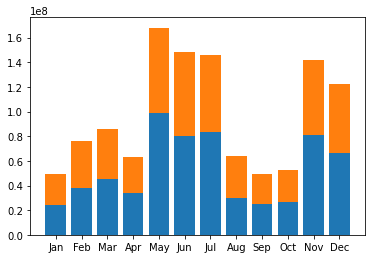

In [39]:
domestic_gross_mean = grouped_gross_no_zero['domestic_gross'].mean()
foreign_gross_mean = grouped_gross_no_zero['foreign_gross'].mean()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_mean)
ax.bar(months, domestic_gross_mean, bottom=foreign_gross_mean);

Text(0, 0.5, 'Gross (tens of millions of dollars)')

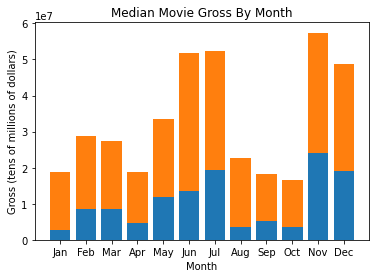

In [40]:
domestic_gross_median = grouped_gross_no_zero['domestic_gross'].median()
foreign_gross_median = grouped_gross_no_zero['foreign_gross'].median()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_median)
ax.bar(months, domestic_gross_median, bottom=foreign_gross_median)

ax.set_title("Median Movie Gross By Month")
ax.set_xlabel("Month")
ax.set_ylabel("Gross (tens of millions of dollars)")

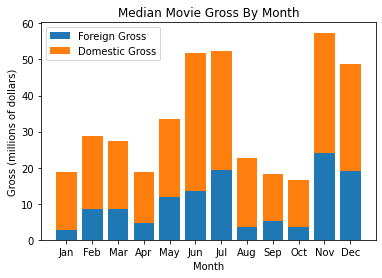

In [41]:
domestic_gross_median = grouped_gross_no_zero['domestic_gross'].median()
foreign_gross_median = grouped_gross_no_zero['foreign_gross'].median()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_median, label='Foreign Gross')
ax.bar(months, domestic_gross_median, bottom=foreign_gross_median, label='Domestic Gross')

ax.set_title("Median Movie Gross By Month")
ax.set_xlabel("Month")
ax.set_ylabel("Gross (millions of dollars)")

def format_number(data_value, idx):
    formatter = '{:1.0f}'.format(data_value*0.000001)
    return formatter
plt.yticks(np.arange(0, 70_000_000, 10_000_000))
ax.yaxis.set_major_formatter(format_number)

ax.legend();

#plt.savefig('median_movie_gross_month.png')

In [42]:
gross_no_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5415 non-null   int64  
 1   release_date       5415 non-null   object 
 2   movie              5415 non-null   object 
 3   production_budget  5415 non-null   float64
 4   domestic_gross     5415 non-null   float64
 5   worldwide_gross    5415 non-null   float64
 6   foreign_gross      5415 non-null   float64
 7   release_month      5415 non-null   object 
 8   month_number       5415 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 423.0+ KB


In [43]:
gross_no_zero['release_year'] = gross_no_zero['release_date'].str[-4:].astype(int)
gross_no_zero.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12,2017


In [44]:
gross_no_zero['release_year'].describe()

count    5415.000000
mean     2003.599446
std        12.546965
min      1915.000000
25%      1999.000000
50%      2006.000000
75%      2012.000000
max      2019.000000
Name: release_year, dtype: float64

In [45]:
gross_recent = gross_no_zero[gross_no_zero['release_year'] >= 1997]
gross_recent.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12,2017


In [46]:
grouped_gross_recent = gross_recent.groupby('month_number')
grouped_gross_recent.mean()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_year
month_number,,,,,,
1,50.778195,2.485784e+07,2.746353e+07,5.684433e+07,2.938080e+07,2008.898496
2,50.498403,3.201040e+07,3.903213e+07,8.234195e+07,4.330982e+07,2008.530351
3,50.172775,3.565175e+07,4.183567e+07,9.013388e+07,4.829821e+07,2008.149215
4,50.384817,2.672459e+07,3.005665e+07,6.778824e+07,3.773159e+07,2008.057592
5,49.414557,5.526434e+07,7.182751e+07,1.806778e+08,1.088503e+08,2008.259494
6,50.023188,5.085091e+07,6.800196e+07,1.560863e+08,8.808437e+07,2008.188406
7,49.578947,4.829000e+07,6.502817e+07,1.568013e+08,9.177312e+07,2007.850877
8,52.733503,2.910880e+07,3.508588e+07,6.919715e+07,3.411127e+07,2007.459391
9,48.431373,2.383433e+07,2.408086e+07,5.048054e+07,2.639968e+07,2007.909314


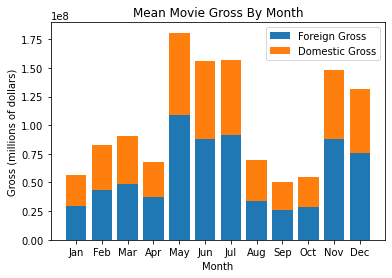

In [47]:
domestic_gross_mean = grouped_gross_recent['domestic_gross'].mean()
foreign_gross_mean = grouped_gross_recent['foreign_gross'].mean()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_mean, label='Foreign Gross')
ax.bar(months, domestic_gross_mean, bottom=foreign_gross_mean, label='Domestic Gross')

ax.set_title("Mean Movie Gross By Month")
ax.set_xlabel("Month")
ax.set_ylabel("Gross (millions of dollars)")

ax.legend();



In [48]:
grouped_gross_recent.median()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_year
month_number,,,,,,
1,48.0,19000000.0,18504178.5,34035337.5,10799881.0,2009.0
2,48.0,22000000.0,22958583.0,43528634.0,13148626.0,2008.0
3,51.0,20000000.0,18626949.0,29437906.0,10216031.5,2008.0
4,51.0,18000000.0,14250917.5,23910786.0,6255147.0,2008.0
5,48.5,21500000.0,21506024.0,38166202.5,14011502.5,2008.5
6,49.0,27000000.0,32267774.0,55443032.0,20110271.0,2008.0
7,49.0,25500000.0,32187940.5,65710949.0,23726380.5,2008.0
8,51.0,20000000.0,19585998.5,32957655.5,7759159.5,2008.0
9,46.0,18000000.0,12295033.0,22903867.0,7075485.5,2008.0


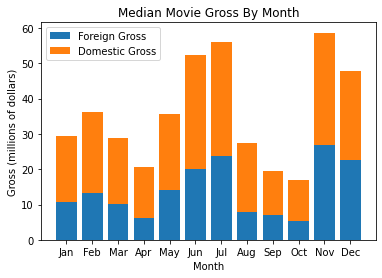

In [49]:
domestic_gross_median = grouped_gross_recent['domestic_gross'].median()
foreign_gross_median = grouped_gross_recent['foreign_gross'].median()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_median, label='Foreign Gross')
ax.bar(months, domestic_gross_median, bottom=foreign_gross_median, label='Domestic Gross')

ax.set_title("Median Movie Gross By Month")
ax.set_xlabel("Month")
ax.set_ylabel("Gross (millions of dollars)")

def format_number(data_value, idx):
    formatter = '{:1.0f}'.format(data_value*0.000001)
    return formatter
plt.yticks(np.arange(0, 70_000_000, 10_000_000))
ax.yaxis.set_major_formatter(format_number)

ax.legend();

#plt.savefig('median_movie_gross_month_recent.png', dpi=300);

In [50]:
gross_recent.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12,2017


In [51]:
month_count_dict = {'Jan':0, 'Feb':0, 'Mar':0, 'Apr':0, 'May':0, 'Jun':0, 'Jul':0, 'Aug':0, 'Sep':0, 'Oct':0, 'Nov':0, 'Dec':0}

for month in gross_recent['release_month']:
    month_count_dict[month] += 1
month_count_dict

{'Jan': 266,
 'Feb': 313,
 'Mar': 382,
 'Apr': 382,
 'May': 316,
 'Jun': 345,
 'Jul': 342,
 'Aug': 394,
 'Sep': 408,
 'Oct': 462,
 'Nov': 378,
 'Dec': 491}

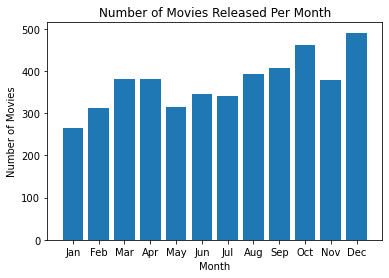

In [58]:
fig,ax = plt.subplots()

ax.bar(month_count_dict.keys(), month_count_dict.values())
ax.set_title('Number of Movies Released Per Month')
ax.set_xlabel('Month')
ax.set_ylabel("Number of Movies");

#plt.savefig('movies_per_month.png', dpi=300)

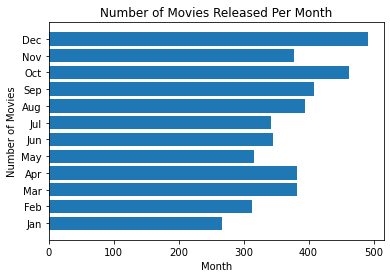

In [67]:
fig,ax = plt.subplots()

ax.barh(list(month_count_dict.keys()), month_count_dict.values())
ax.set_title('Number of Movies Released Per Month')
ax.set_xlabel('Month')
ax.set_ylabel("Number of Movies");

In [35]:
# Extract IMDb SQL .db file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    # Extract all contents of .zip file into current directory
    zipObj.extractall(path='./zippedData/')
    
# Create connection to IMDb DB
con = sqlite3.connect('./zippedData/im.db')


In [36]:
principals=pd.read_sql("""
SELECT *
FROM principals;
""", con)

In [37]:
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [38]:
known_for=pd.read_sql("""
SELECT *
FROM known_for;
""", con)
known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [40]:
persons=pd.read_sql("""
SELECT *
FROM persons;
""", con)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [41]:
movie_basics_ratings=pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings USING (movie_id);
""", con)
movie_basics_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [42]:
movie_ratings=pd.read_sql("""
SELECT *
FROM movie_ratings;
""", con)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [43]:
print(movie_ratings['numvotes'].describe())

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64
